# Image Classification Using CNN with VGG19 Architecture

### 1 Input Fundus Image

In [10]:
# initial data directory .
data_dir_nonaug = 'dataRETINA'

In [11]:
import os
import cv2
# labeling and resizing all of data that'll be used .
# 0 = ROP and 1 = NonROP .
data_nonaug = []
categories = ['ROP', 'NonROP']
img_size = 224

for category in categories:
    path = os.path.join(data_dir_nonaug, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            data_nonaug.append([new_array, class_num])
        except Exception as e:
            pass
print('\n Number of image data before augmentation: {0}'.format(len(data_nonaug)))


 Number of image data before augmentation: 91


In [12]:
import os
import cv2
import numpy as np
# set X and y nonaug .
X_nonaug = []
y_nonaug = []

for features, label in data_nonaug:
    X_nonaug.append(features)
    y_nonaug.append(label)
    
y_nonaug = np.array(y_nonaug)

### 2 Data Augmentation 

In [13]:
import os
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
datagen = ImageDataGenerator(
        rotation_range= 2,
        width_shift_range= 0.05,
        height_shift_range= 0.05,
        zoom_range = [0.85, 1.15],
        horizontal_flip = True,
        fill_mode ='nearest')

# NonROP's augmentation .
path_NonROP = os.path.join(data_dir_nonaug, 'NonROP')
for img in os.listdir(path_NonROP):
    image = load_img('dataRETINA/NonROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmented/NonROP', 
                              save_prefix='NonROP', save_format='jpg'):
        i += 1
        if i > 26:
            break
# ROP's augmentation .
path_ROP = os.path.join(data_dir_nonaug, 'ROP')
for img in os.listdir(path_ROP):
    image = load_img('dataRETINA/ROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmented/ROP', 
                              save_prefix='ROP', save_format='jpg'):
        i += 1
        if i > 20:
            break

### 3 Image Preprocessing

In [16]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# new data directory .
data_dir = 'dataRETINAaugmented'

In [18]:
# checking image class .
image_class = []
for classes in os.listdir(data_dir):
    image_class.append(classes)

print('\n image class in dataRETINAaugmented directory: {}'.format(image_class))


 image class in dataRETINAaugmented directory: ['NonROP', 'ROP']


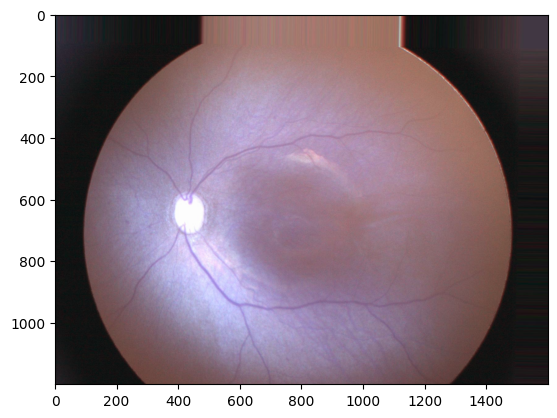


 img size =  (1200, 1600, 3)


In [19]:
# checking input data by showing the image .
categories = ['ROP', 'NonROP']

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
print('\n img size = ', img_array.shape)

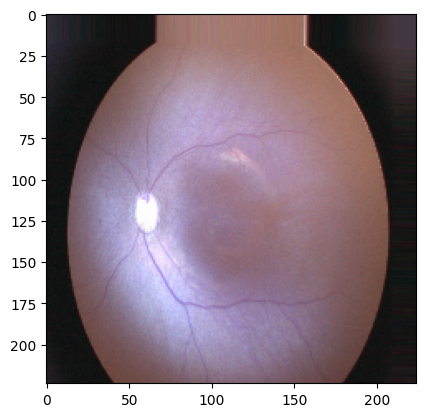


 img size =  (224, 224, 3)


In [20]:
# example of resizing image .
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()
print('\n img size = ', new_array.shape)

In [22]:
# labeling and resizing all of data that'll be used .
# 0 = ROP and 1 = NonROP .
data = []
categories = ['ROP', 'NonROP']
img_size = 224

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            data.append([new_array, class_num])
        except Exception as e:
            pass
print('\n Number of image data to be used: {0}'.format(len(data)))


 Number of image data to be used: 2035


In [23]:
# set X and y aug .
X_aug = []
y_aug = []

for features, label in data:
    X_aug.append(features)
    y_aug.append(label)
    
y_aug = np.array(y_aug)

---Dataset BEFORE Augmentation---


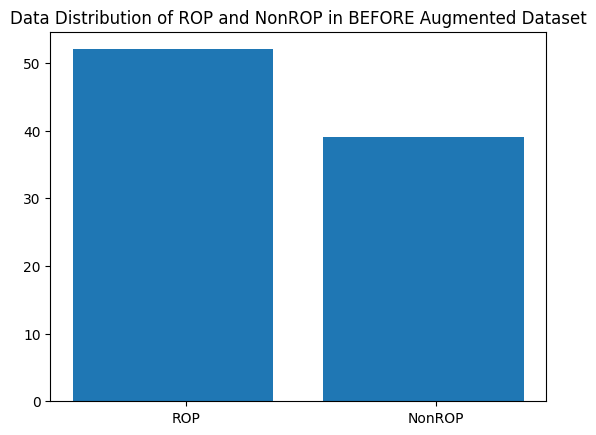


 Number of ROP data in BEFORE dataset augmentation: 52

 Number of NonROP data in BEFORE dataset augmentation: 39


---Dataset AFTER Augmentation---


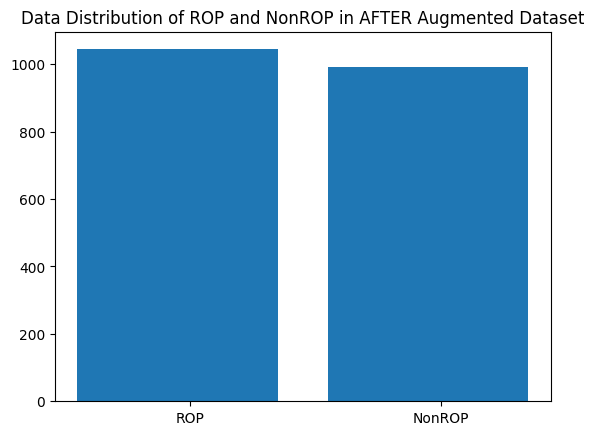


 Number of ROP data in AFTER dataset augmentation: 1044

 Number of NonROP data in AFTER dataset augmentation: 991




In [30]:
# before vs after augmentation data visualization .
a_nonaug = 0; b_nonaug = 0; c_aug = 0; d_aug = 0

for i in range(len(y_nonaug)):
    if y_nonaug[i] == 0:
        a_nonaug += 1
    else:
        b_nonaug += 1
for i in range(len(y_aug)):
    if y_aug[i] == 0:
        c_aug += 1
    else:
        d_aug += 1

data_nonaug = np.array([a_nonaug, b_nonaug])
data_aug = np.array([c_aug, d_aug])
dataplot_aug = [data_nonaug, data_aug]
jumlah_ROP_aug = [a_nonaug, c_aug]
jumlah_NonROP_aug = [b_nonaug, d_aug]
split_aug = ['BEFORE', 'AFTER']

for i in range(len(dataplot_aug)):
    positions = np.arange(2)
    plt.bar(positions, dataplot_aug[i], 0.8)
    plt.xticks(positions + 0.05, ('ROP', 'NonROP'))
    plt.title('Data Distribution of ROP and NonROP in {} Augmented Dataset'.format(split_aug[i]))
    print('---Dataset {} Augmentation---'.format(split_aug[i]))
    plt.show()
    print('\n Number of ROP data in {} dataset augmentation: {}'.format(split_aug[i], jumlah_ROP_aug[i]))
    print('\n Number of NonROP data in {} dataset augmentation: {}'.format(split_aug[i], jumlah_NonROP_aug[i]))
    print('\n')

### 4 Data Preparation

In [31]:
import random
import numpy as np

In [33]:
# shuffling data .
before = []
for sample in data[:10]:
    before.append(sample[1])
print('\n Data before shuffling: {}'.format(before))

random.shuffle(data)
after = []
for sample in data[:10]:
    after.append(sample[1])
print('\n Data after shuffling: {}'.format(after))


 Data before shuffling: [1, 1, 0, 1, 0, 0, 0, 1, 1, 1]

 Data after shuffling: [1, 0, 1, 0, 1, 0, 1, 1, 0, 0]


In [34]:
# set X and y .
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [35]:
# Normalization .
X = X/255.0

### 5 Data Splitting

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# defining the ratio of train-val-test data .
train_ratio = 0.80
val_ratio = 0.10
test_ratio = 0.10

# splitting data into train-val-test data .
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (1 - train_ratio), random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = test_ratio/(test_ratio + val_ratio), random_state = 1) 

---Training Dataset---


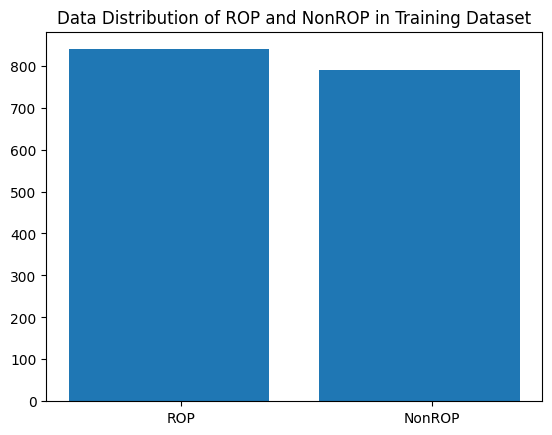


 Number of ROP data in Training dataset: 839

 Number of NonROP data in Training dataset: 789


---Validation Dataset---


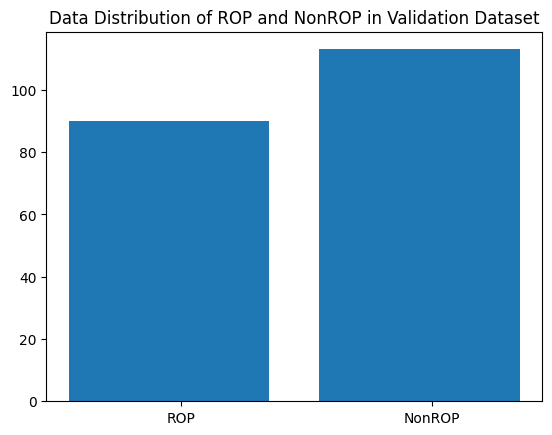


 Number of ROP data in Validation dataset: 90

 Number of NonROP data in Validation dataset: 113


---Test Dataset---


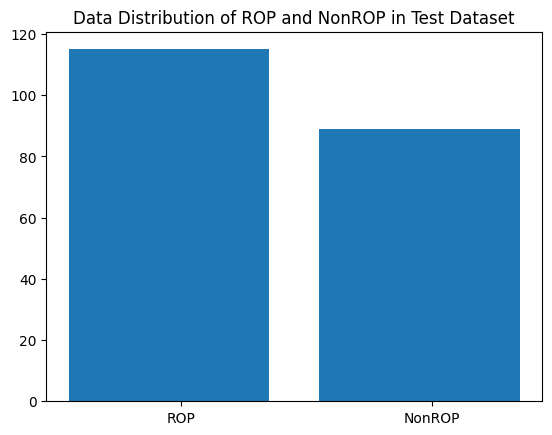


 Number of ROP data in Test dataset: 115

 Number of NonROP data in Test dataset: 89




In [39]:
# data distribution visualization .
a = 0; b = 0; c = 0; d = 0; e = 0; f = 0

for i in range(len(y_train)):
    if y_train[i] == 0:
        a += 1
    else:
        b += 1
for i in range(len(y_val)):
    if y_val[i] == 0:
        c += 1
    else:
        d += 1
for i in range(len(y_test)):
    if y_test[i] == 0:
        e += 1
    else:
        f += 1

data1 = np.array([a, b])
data2 = np.array([c, d])
data3 = np.array([e, f])
dataplot = [data1, data2, data3]
jumlah_ROP = [a, c, e]
jumlah_NonROP = [b, d, f]
split = ['Training', 'Validation', 'Test']

for i in range(len(dataplot)):
    positions = np.arange(2)
    plt.bar(positions, dataplot[i], 0.8)
    plt.xticks(positions + 0.05, ('ROP', 'NonROP'))
    plt.title('Data Distribution of ROP and NonROP in {} Dataset'.format(split[i]))
    print('---{} Dataset---'.format(split[i]))
    plt.show()
    print('\n Number of ROP data in {} dataset: {}'.format(split[i], jumlah_ROP[i]))
    print('\n Number of NonROP data in {} dataset: {}'.format(split[i], jumlah_NonROP[i]))
    print('\n')

### 6 Modelling and Training Model

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [42]:
# callbacks for model .
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)
model_checkpoint = ModelCheckpoint('best_ROP_model.keras', save_best_only = True)

In [43]:
# optimizer .
opt = Adam(learning_rate=2*(10**(-5)))

# VGG19 Architecture .
model = Sequential()

# Block 1
model.add(Conv2D(64, (3,3), activation ='relu', input_shape = X.shape[1:], padding='same'))
model.add(Conv2D(64, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'))

# Block 2
model.add(Conv2D(128, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'))

# Block 3
model.add(Conv2D(256, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

# Block 4
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'))

# Block 5
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation ='relu', padding='same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(4096, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation ='relu'))

model.add(Dense(2, activation ='softmax'))

model.compile(optimizer = opt,
              loss ='sparse_categorical_crossentropy',
              metrics =['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs = 20, 
                    batch_size = 32, 
                    validation_data=(X_val, y_val), 
                    callbacks = [monitor_val_acc, model_checkpoint])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 647s 12s/step - accuracy: 0.4949 - loss: 0.6929 - val_accuracy: 0.4433 - val_loss: 0.6988
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 603s 12s/step - accuracy: 0.5272 - loss: 0.6858 - val_accuracy: 0.5517 - val_loss: 0.6789
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 605s 12s/step - accuracy: 0.6436 - loss: 0.6551 - val_accuracy: 0.6700 - val_loss: 0.6608
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 602s 12s/step - accuracy: 0.6603 - loss: 0.6374 - val_accuracy: 0.6995 - val_loss: 0.6031
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 600s 12s/step - accuracy: 0.7017 - loss: 0.5791 - val_accuracy: 0.6995 - val_loss: 0.5615
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 601s 12s/step - accuracy: 0.7419 - loss: 0.5330 - val_accuracy: 0.7635 - val_loss: 0.4922
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 601s 12s/step - accuracy: 0.7819 - loss: 0.4449 - val_accuracy: 0.7340 - val_loss: 0.4871
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 603s 12s/step - accuracy: 0.7955 - loss: 0.4105 - val_accuracy: 0.

### 7 Model's Evaluation

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [45]:
# model summary .
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,31

 Total params: 431,007,728 (1.61 GB)

 Trainable params: 143,669,242 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 287,338,486 (1.07 GB)

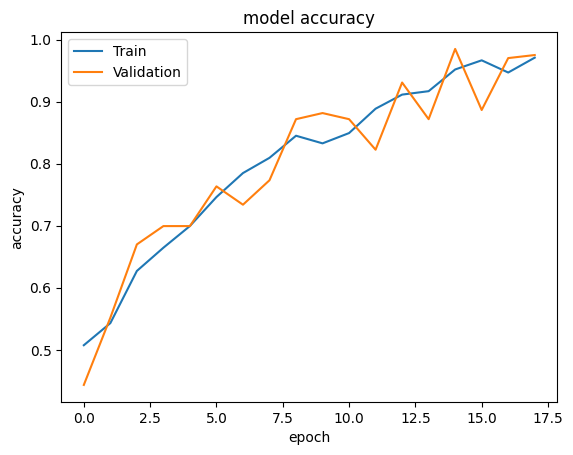

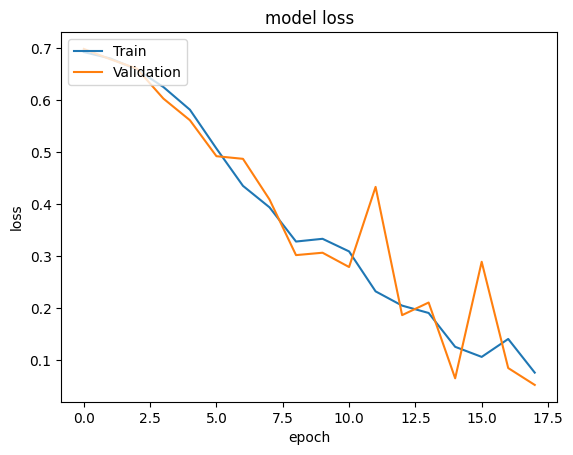

In [46]:
# history for accuracy .
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# history for loss .
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:
# target data .
print('\n y_test = {}'.format(y_test))

# model prediction .
y_model = model.predict(X_test)
y_pred = np.argmax(y_model, axis = 1)
print('\n y_pred = {}'.format(y_pred))


 y_test = [0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0
 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0]
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step

 y_pred = [0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1
 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0]


In [48]:
# evaluate model using test dataset .
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9630 - loss: 0.0551


[0.05309079959988594, 0.9656862616539001]

In [49]:
# classification report .
print('\n Classification Report:')
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.96      0.97      0.96        89

    accuracy                           0.97       204
   macro avg       0.96      0.97      0.97       204
weighted avg       0.97      0.97      0.97       204




 Confusion Matrix:
[[111   4]
 [  3  86]]


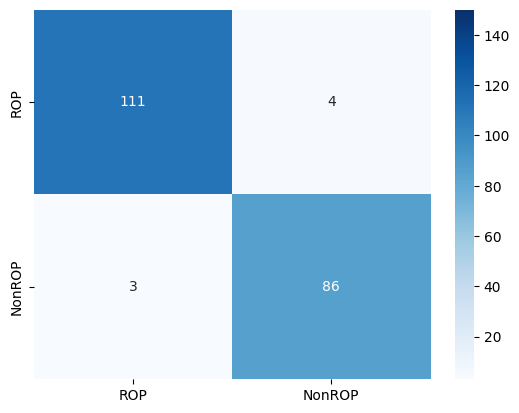

In [50]:
# confusion matrix .
print('\n Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# plotting confusion matrix .
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap='Blues', vmax = 150, 
            fmt='g', xticklabels=['ROP', 'NonROP'], yticklabels=['ROP', 'NonROP'])
plt.show()

### 8 Predict New Data

In [52]:
# load saved model .
model = tf.keras.models.load_model('best_ROP_model.keras')

In [54]:
# initial data directory .
data_dir = 'dataRETINA'

# produce new dataset .
datagen = ImageDataGenerator(
        rotation_range= 2,
        width_shift_range= 0.05,
        height_shift_range= 0.05,
        zoom_range = [0.85, 1.15],
        horizontal_flip = True,
        fill_mode ='nearest')

# NonROP's augmentation .
path_NonROP = os.path.join(data_dir, 'NonROP')
for img in os.listdir(path_NonROP):
    image = load_img('dataRETINA/NonROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmentedTEST/NonROP', 
                              save_prefix='NonROP', save_format='jpg'):
        i += 1
        if i > 1:
            break
# ROP's augmentation .
path_ROP = os.path.join(data_dir, 'ROP')
for img in os.listdir(path_ROP):
    image = load_img('dataRETINA/ROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmentedTEST/ROP', 
                              save_prefix='ROP', save_format='jpg'):
        i += 1
        if i > 1:
            break

In [56]:
# new data directory .
data_dirTEST = 'dataRETINAaugmentedTEST'

# labeling and resizing all of data that'll be used .
# 0 = ROP and 1 = NonROP .
dataTEST = []
categories = ['ROP', 'NonROP']
img_size = 224

for category in categories:
    path = os.path.join(data_dirTEST, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            dataTEST.append([new_array, class_num])
        except Exception as e:
            pass
print('\n Number of image data to be used: {0}'.format(len(dataTEST)))


 Number of image data to be used: 181


In [62]:
# shuffling data .
before = []
for sample in dataTEST[:10]:
    before.append(sample[1])
print('\n Data before shuffle: {}'.format(before))

random.shuffle(dataTEST)
after = []
for sample in dataTEST[:10]:
    after.append(sample[1])
print('\n Data after shuffle: {}'.format(after))


 Data before shuffle: [0, 0, 1, 1, 0, 1, 0, 0, 1, 0]

 Data after shuffle: [1, 0, 1, 0, 0, 0, 0, 0, 1, 1]


In [63]:
# set X and y .
X = []
y = []

for features, label in dataTEST:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [64]:
# Normalization .
X = X/255.0

In [65]:
# target data .
print('\n y_test = {}'.format(y))

# model prediction .
y_mod = model.predict(X)
y_predict = np.argmax(y_mod, axis = 1)
print('\n y_pred = {}'.format(y_predict))


 y_test = [1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1
 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1
 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1]
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step

 y_pred = [1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1
 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1
 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1
 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1]


In [66]:
# evaluate model using test dataset .
model.evaluate(X, y)

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9730 - loss: 0.0755


[0.07248836755752563, 0.9779005646705627]

In [67]:
# classification report .
print('\n Classification Report:')
print(classification_report(y, y_predict))


 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       103
           1       0.96      0.99      0.97        78

    accuracy                           0.98       181
   macro avg       0.98      0.98      0.98       181
weighted avg       0.98      0.98      0.98       181




 Confusion Matrix:
[[100   3]
 [  1  77]]


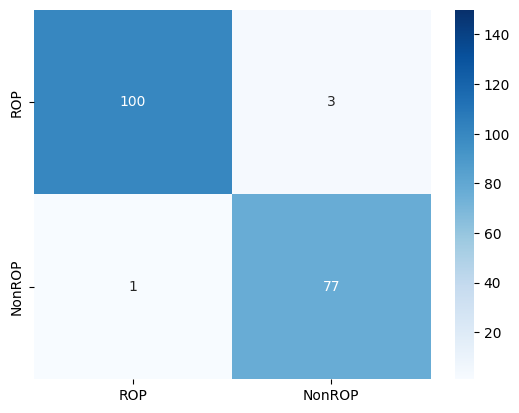

In [68]:
# confusion matrix .
print('\n Confusion Matrix:')
print(confusion_matrix(y, y_predict))

# plotting confusion matrix .
sns.heatmap(confusion_matrix(y, y_predict), annot = True, cmap='Blues', vmax = 150, 
            fmt='g', xticklabels=['ROP', 'NonROP'], yticklabels=['ROP', 'NonROP'])
plt.show()

### 9 Predict New Data 2

In [69]:
# initial data directory .
data_dir = 'dataRETINA'

datagen = ImageDataGenerator(
        rotation_range= 2,
        width_shift_range= 0.05,
        height_shift_range= 0.05,
        zoom_range = [0.85, 1.15],
        horizontal_flip = True,
        fill_mode ='nearest')

# NonROP's augmentation .
path_NonROP = os.path.join(data_dir, 'NonROP')
for img in os.listdir(path_NonROP):
    image = load_img('dataRETINA/NonROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmentedTEST2/NonROP', 
                              save_prefix='NonROP', save_format='jpg'):
        i += 1
        if i > 1:
            break
            
# ROP's augmentation .
path_ROP = os.path.join(data_dir, 'ROP')
for img in os.listdir(path_ROP):
    image = load_img('dataRETINA/ROP/{0}'.format(img)) 
    x = img_to_array(image)  
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='dataRETINAaugmentedTEST2/ROP', 
                              save_prefix='ROP', save_format='jpg'):
        i += 1
        if i > 1:
            break

In [70]:
# new data directory .
data_dirTEST2 = 'dataRETINAaugmentedTEST2'

# labeling and resizing all of data that'll be used .
# 0 = ROP and 1 = NonROP .
dataTEST2 = []
categories = ['ROP', 'NonROP']
img_size = 224

for category in categories:
    path = os.path.join(data_dirTEST2, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try: 
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            dataTEST2.append([new_array, class_num])
        except Exception as e:
            pass
print('\n Jumlah image data yang akan digunakan: {0}'.format(len(dataTEST2)))


 Jumlah image data yang akan digunakan: 179


In [71]:
# shuffling data .
before2 = []
for sample in dataTEST2[:10]:
    before2.append(sample[1])
print('\n Data yang dipunya: {}'.format(before2))

random.shuffle(dataTEST2)
after2 = []
for sample in dataTEST2[:10]:
    after2.append(sample[1])
print('\n Data yang dipunya setelah shuffle: {}'.format(after2))


 Data yang dipunya: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

 Data yang dipunya setelah shuffle: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [72]:
# set X and y .
X2 = []
y2 = []

for features, label in dataTEST2:
    X2.append(features)
    y2.append(label)

X2 = np.array(X2).reshape(-1, img_size, img_size, 3)
y2 = np.array(y2)

In [73]:
# Normalization .
X2 = X2/255.0

In [74]:
# target data .
print('\n y_test = {}'.format(y2))

# model prediction .
y_mod2 = model.predict(X2)
y_predict2 = np.argmax(y_mod2, axis = 1)
print('\n y_pred = {}'.format(y_predict2))


 y_test = [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0
 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0]
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step

 y_pred = [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0
 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0]


In [75]:
# evaluate model using test dataset .
model.evaluate(X2, y2)

6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9913 - loss: 0.0359


[0.044194526970386505, 0.9888268113136292]

In [76]:
# classification report .
print('\n Classification Report:')
print(classification_report(y2, y_predict2))


 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       101
           1       0.99      0.99      0.99        78

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179




 Confusion Matrix:
[[100   1]
 [  1  77]]


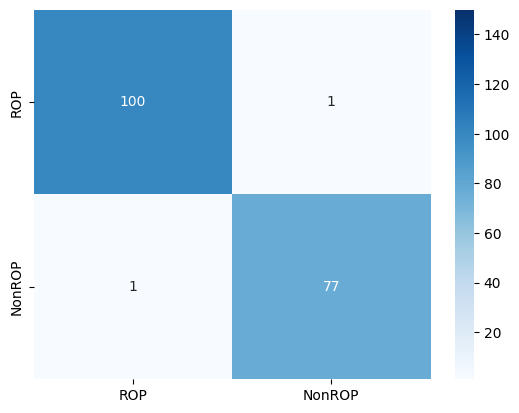

In [77]:
# confusion matrix .
print('\n Confusion Matrix:')
print(confusion_matrix(y2, y_predict2))

# plotting confusion matrix .
sns.heatmap(confusion_matrix(y2, y_predict2), annot = True, cmap='Blues', vmax = 150, 
            fmt='g', xticklabels=['ROP', 'NonROP'], yticklabels=['ROP', 'NonROP'])
plt.show()